## Regression Project

### **Preparation**

### Import Libraries

In [ ]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import (
    GradientBoostingRegressor,
    RandomForestRegressor,
    ExtraTreesRegressor,
    AdaBoostRegressor,
)

### Load Dataset

In [2]:
# Load dataset
filename = "data/housing.csv"
names = [
    "CRIM",
    "ZN",
    "INDUS",
    "CHAS",
    "NOX",
    "RM",
    "AGE",
    "DIS",
    "RAD",
    "TAX",
    "PTRATIO",
    "B",
    "LSTAT",
    "MEDV",
]
dataset = pd.read_csv(filename, sep="\\s+", names=names)

### **Analyze (Summarize) Data**

In [3]:
# shape
print(dataset.shape)

(506, 14)


In [4]:
# types
print(dataset.dtypes)

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object


In [5]:
# head
print(dataset.head(20))

       CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD    TAX  \
0   0.00632  18.0   2.31     0  0.538  6.575   65.2  4.0900    1  296.0   
1   0.02731   0.0   7.07     0  0.469  6.421   78.9  4.9671    2  242.0   
2   0.02729   0.0   7.07     0  0.469  7.185   61.1  4.9671    2  242.0   
3   0.03237   0.0   2.18     0  0.458  6.998   45.8  6.0622    3  222.0   
4   0.06905   0.0   2.18     0  0.458  7.147   54.2  6.0622    3  222.0   
5   0.02985   0.0   2.18     0  0.458  6.430   58.7  6.0622    3  222.0   
6   0.08829  12.5   7.87     0  0.524  6.012   66.6  5.5605    5  311.0   
7   0.14455  12.5   7.87     0  0.524  6.172   96.1  5.9505    5  311.0   
8   0.21124  12.5   7.87     0  0.524  5.631  100.0  6.0821    5  311.0   
9   0.17004  12.5   7.87     0  0.524  6.004   85.9  6.5921    5  311.0   
10  0.22489  12.5   7.87     0  0.524  6.377   94.3  6.3467    5  311.0   
11  0.11747  12.5   7.87     0  0.524  6.009   82.9  6.2267    5  311.0   
12  0.09378  12.5   7.87 

In [6]:
# descriptions
print(dataset.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

In [7]:
# correlation
print(dataset.corr(method="pearson"))

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 

### **Data Visualizations**

### Univariate Data Visualizations

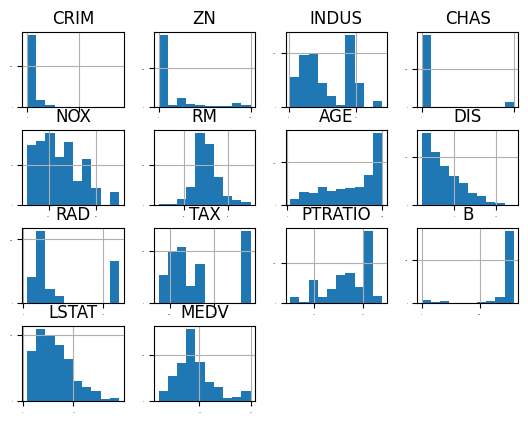

In [8]:
# histograms
dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
plt.show()

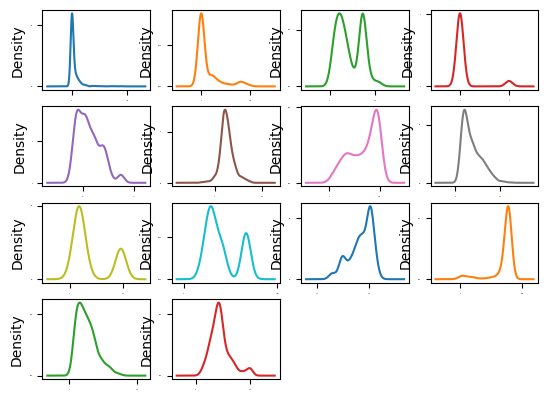

In [9]:
# density
dataset.plot(
    kind="density", subplots=True, layout=(4, 4), sharex=False, legend=False, fontsize=1
)
plt.show()

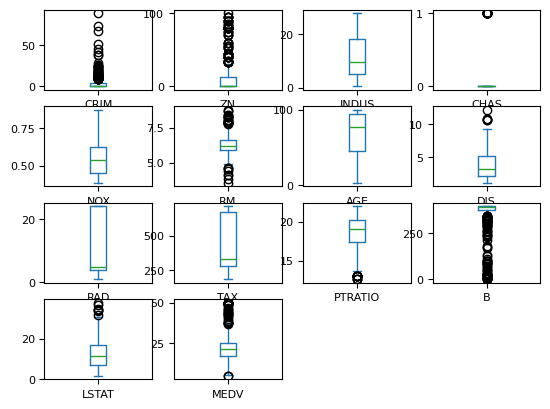

In [10]:
# box and whisker plots
dataset.plot(
    kind="box", subplots=True, layout=(4, 4), sharex=False, sharey=False, fontsize=8
)
plt.show()

### Multivariate Data Visualizations

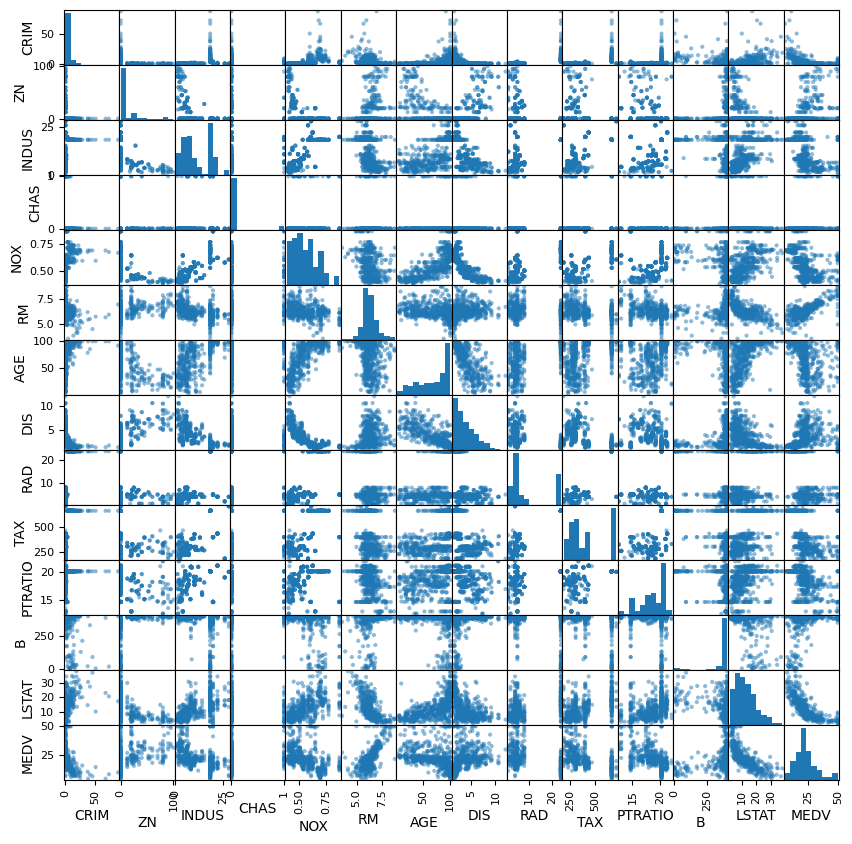

In [11]:
# scatter plot matrix
pd.plotting.scatter_matrix(dataset, figsize=(10, 10))
plt.show()

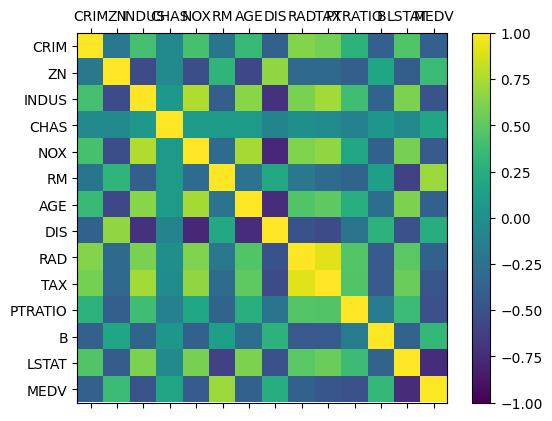

In [12]:
# correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation="none")
fig.colorbar(cax)
ticks = np.arange(0, 14, 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

### **Validation Dataset**

In [13]:
# Split-out validation dataset
array = dataset.values
X = array[:, 0:13]
y = array[:, 13]
validation_size = 0.20
seed = 7
X_train, X_validation, y_train, y_validation = train_test_split(
    X, y, test_size=validation_size, random_state=seed
)

### **Evaluate Algorithms: Baseline**

In [14]:
# Test options and evaluation metrics
seed = 7
scoring = "neg_mean_squared_error"
num_folds = 10

In [17]:
# Spot-Check Algorithms
models = []
models.append(("LR", LinearRegression()))
models.append(("LASSO", Lasso()))
models.append(("EN", ElasticNet()))
models.append(("KNN", KNeighborsRegressor()))
models.append(("CART", DecisionTreeRegressor()))
models.append(("SVR", SVR()))

In [ ]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -22.006009 (12.188886)
LASSO: -27.105803 (13.165915)
EN: -27.923014 (13.156405)
KNN: -39.808936 (16.507968)
CART: -25.921084 (17.044091)
SVR: -67.824705 (32.801530)


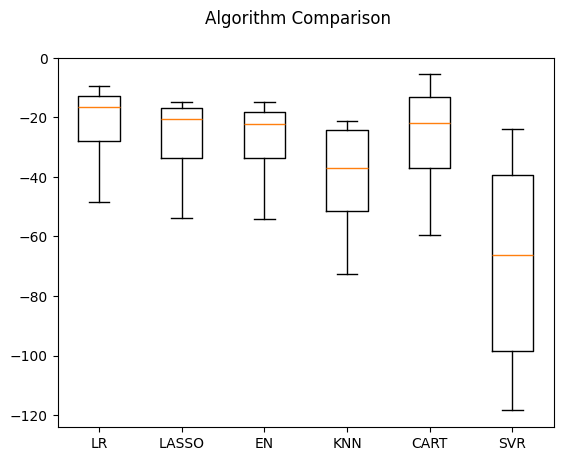

In [20]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### **Evaluate Algorithms: Standardization**

In [ ]:
# Standardize the dataset
pipelines = []
pipelines.append(
    ("ScaledLR", Pipeline([("Scaler", StandardScaler()), ("LR", LinearRegression())]))
)
pipelines.append(
    ("ScaledLASSO", Pipeline([("Scaler", StandardScaler()), ("LASSO", Lasso())]))
)
pipelines.append(
    ("ScaledEN", Pipeline([("Scaler", StandardScaler()), ("EN", ElasticNet())]))
)
pipelines.append(
    (
        "ScaledKNN",
        Pipeline([("Scaler", StandardScaler()), ("KNN", KNeighborsRegressor())]),
    )
)
pipelines.append(
    (
        "ScaledCART",
        Pipeline([("Scaler", StandardScaler()), ("CART", DecisionTreeRegressor())]),
    )
)
pipelines.append(
    ("ScaledSVR", Pipeline([("Scaler", StandardScaler()), ("SVR", SVR())]))
)
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: -22.006009 (12.188886)
ScaledLASSO: -27.205896 (12.124418)
ScaledEN: -28.301160 (13.609110)
ScaledKNN: -21.456867 (15.016218)
ScaledCART: -26.229460 (18.657974)
ScaledSVR: -29.570433 (18.052964)


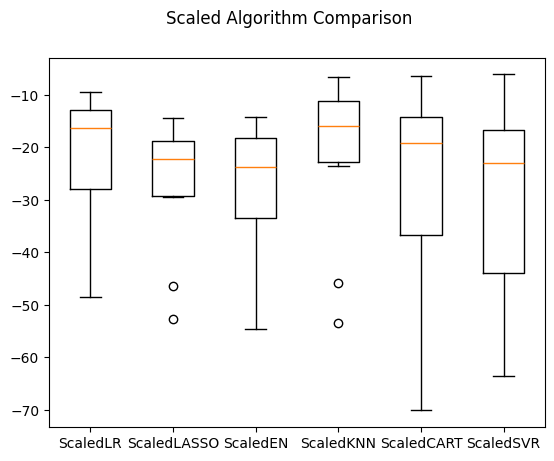

In [23]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle("Scaled Algorithm Comparison")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### **Improve Results With Tuning**

In [ ]:
# KNN Algorithm tuning
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
k_values = np.array([1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21])
param_grid = dict(n_neighbors=k_values)
model = KNeighborsRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, y_train)

In [27]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -19.497829 using {'n_neighbors': np.int64(1)}
-19.497829 (15.769847) with: {'n_neighbors': np.int64(1)}
-19.977984 (13.803973) with: {'n_neighbors': np.int64(3)}
-21.270967 (14.833544) with: {'n_neighbors': np.int64(5)}
-21.577292 (14.952592) with: {'n_neighbors': np.int64(7)}
-21.001075 (14.701297) with: {'n_neighbors': np.int64(9)}
-21.490306 (14.866957) with: {'n_neighbors': np.int64(11)}
-21.268533 (14.454969) with: {'n_neighbors': np.int64(13)}
-21.968092 (14.209894) with: {'n_neighbors': np.int64(15)}
-22.739880 (14.492752) with: {'n_neighbors': np.int64(17)}
-23.506901 (14.903224) with: {'n_neighbors': np.int64(19)}
-24.240303 (15.156565) with: {'n_neighbors': np.int64(21)}


### **Ensemble Methods**

In [ ]:
# ensembles
ensembles = []
ensembles.append(
    ("ScaledAB", Pipeline([("Scaler", StandardScaler()), ("AB", AdaBoostRegressor())]))
)
ensembles.append(
    (
        "ScaledGBM",
        Pipeline([("Scaler", StandardScaler()), ("GBM", GradientBoostingRegressor())]),
    )
)
ensembles.append(
    (
        "ScaledRF",
        Pipeline([("Scaler", StandardScaler()), ("RF", RandomForestRegressor())]),
    )
)
ensembles.append(
    (
        "ScaledET",
        Pipeline([("Scaler", StandardScaler()), ("ET", ExtraTreesRegressor())]),
    )
)
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledAB: -16.502636 (9.039062)
ScaledGBM: -11.027503 (8.585087)
ScaledRF: -12.448996 (9.665039)
ScaledET: -9.179221 (6.772756)


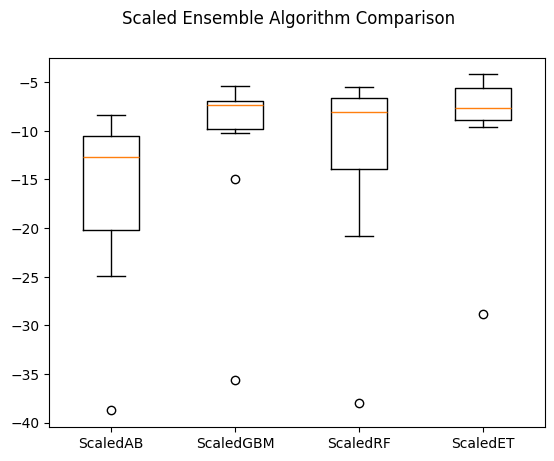

In [30]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle("Scaled Ensemble Algorithm Comparison")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### **Tune Ensemble Methods**

In [ ]:
# Tune scaled GBM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=np.array([50, 100, 150, 200, 250, 300, 350, 400]))
model = GradientBoostingRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, y_train)

In [32]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -10.560638 using {'n_estimators': np.int64(400)}
-11.629999 (8.833221) with: {'n_estimators': np.int64(50)}
-11.073455 (8.772155) with: {'n_estimators': np.int64(100)}
-10.838924 (8.734377) with: {'n_estimators': np.int64(150)}
-10.785568 (8.657244) with: {'n_estimators': np.int64(200)}
-10.654778 (8.540552) with: {'n_estimators': np.int64(250)}
-10.649385 (8.497232) with: {'n_estimators': np.int64(300)}
-10.589337 (8.413596) with: {'n_estimators': np.int64(350)}
-10.560638 (8.353747) with: {'n_estimators': np.int64(400)}


### **Finalize Model**

In [33]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = GradientBoostingRegressor(n_estimators=400, random_state=seed)
model.fit(rescaledX, y_train)

,loss,'squared_error'
,learning_rate,0.1
,n_estimators,400
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [34]:
# transform the validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(mean_squared_error(y_validation, predictions))

11.902132586880027
